## *******HAND WRITTEN DIGIT RECOGNITION USING NEURAL NETWORK:****************

## importing all the necessary libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np


In [5]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [8]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
len(x_train)

60000

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## observations:

In [14]:
# no of rows in x_train and y_train=6000
# no of rows in x_test,y_test=1000
# shape of a each number =28*28 (784) in matrix array
# y _train and y_test represents the output of each digit i.e(0,1,2,3,4,5,6,7,8,9)

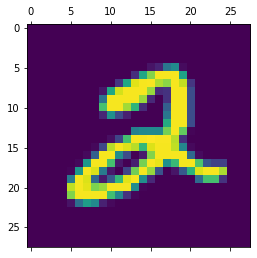

In [17]:
# lets visualize the digit
plt.matshow(x_train[5])

In [19]:
print(y_train[5])

2


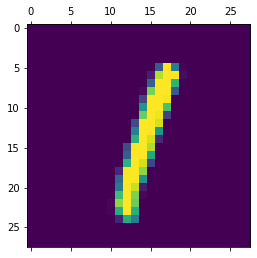

In [20]:
plt.matshow(x_test[5])

CPU times: user 40.9 ms, sys: 947 µs, total: 41.9 ms
Wall time: 41.7 ms


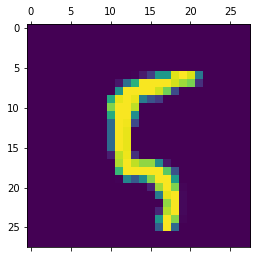

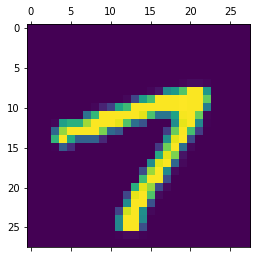

In [44]:
%%time
for i in x_train[100:102]:
  plt.matshow(i)

In [28]:
x_train[0].shape

(28, 28)

In [30]:
x_train[0]  # in matrix form  and we need to scale our datasets:

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## scaling our datasets:

In [31]:
x_train_scaled=x_train/255                 # 0-black   255-white
x_test_scaled=x_test/255

In [33]:

# flattening our datasets: ( converting 2 dimension matrix into one dimension array)

x_train_flat=x_train_scaled.reshape(len(x_train),28*28)
x_test_flat=x_test_scaled.reshape(len(x_test),28*28)

In [34]:
x_train_flat.shape

(60000, 784)

In [35]:
x_test_flat.shape

(10000, 784)

## building our model without hidden layer , lets check the accuracy ;

In [43]:
%%time
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation ="sigmoid")])      # output layer=10, inputlayer=784, activation=sigmoid (bcz its a  binary classification)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train_flat,y_train,epochs=5)                                                       # epoch=5 ( 5 times the layer will run)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4700 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3044 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2837 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2662 - accuracy: 0.9258
CPU times: user 14.6 s, sys: 1.43 s, total: 16.1 s
Wall time: 21.1 s


In [ ]:
# we are getting a accuracy of almost 93%


In [45]:
# evaluate the model

model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2719 - accuracy: 0.9212


[0.2718774080276489, 0.9211999773979187]

## prediction of x_test

In [46]:
y_pred=model.predict(x_test_flat)

In [49]:
y_pred[5]             # its is gving 10 output for first row , bcz we have 10 output layers at output layer,  so we need to take maximum of these arrays

array([1.16388976e-04, 9.98543799e-01, 4.81294721e-01, 4.70272094e-01,
       9.59399343e-03, 2.71933973e-02, 8.89620185e-03, 6.19720936e-01,
       5.44748366e-01, 1.92405850e-01], dtype=float32)

In [55]:
# so we need to take maximum value of y_pred 

np.argmax(y_pred[5])

1

In [53]:
# we can also convert y_pred output in integer;

y_pred_int=[np.argmax(i) for i in y_pred]

In [54]:
# comparing with y_pred and y_pred_int
y_pred_int[5] 

1

## plotting the confusion matrix

In [57]:
con_mat=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_int)

In [59]:
con_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    2,    0,    4,    3,    2,    2,    0],
       [   0, 1118,    3,    3,    0,    1,    3,    2,    5,    0],
       [  10,   11,  899,   28,   14,    2,   12,   11,   41,    4],
       [   4,    0,   13,  935,    0,   16,    2,   11,   21,    8],
       [   2,    2,    2,    1,  916,    0,   11,    4,    8,   36],
       [  11,    3,    1,   48,   11,  758,   13,    7,   33,    7],
       [  15,    3,    7,    1,   11,   11,  906,    2,    2,    0],
       [   1,    7,   19,    8,    9,    1,    0,  939,    2,   42],
       [   9,   14,    6,   26,    9,   26,    8,   12,  854,   10],
       [  11,    7,    1,   10,   30,    6,    0,   18,    6,  920]],
      dtype=int32)>

## visualizing the confusion matrix with seaborn:

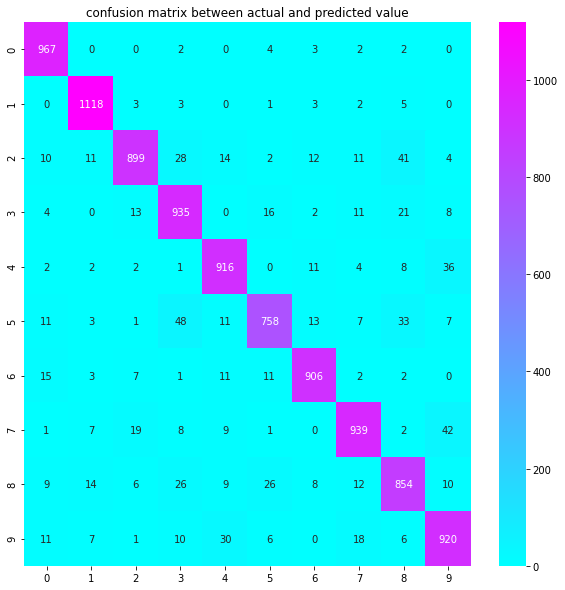

In [72]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.xlabel("predicted")
plt.ylabel("actual value")
plt.title("confusion matrix between actual and predicted value")
sns.heatmap(con_mat,annot=True,fmt="d",cmap="cool")

## lets check the accuracy with including the hidden layer

In [73]:
# hidden layer improves the accuracy 

In [74]:
%%time
model1=keras.Sequential([keras.layers.Dense(110,input_shape=(784,),activation="relu"),  # hidden layers=110, activation= relu
                         keras.layers.Dense(10,activation="sigmoid")])                  # output layers=10 , activation ="sigmoid"
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model1.fit(x_train_flat,y_train,epochs=5)   

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2673 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1189 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0821 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0608 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0482 - accuracy: 0.9853
CPU times: user 28.7 s, sys: 2.18 s, total: 30.8 s
Wall time: 41.5 s


In [75]:
# so by adding the hidden layers our accuracy got increased to 98.5 % , thats really cool

In [76]:
y_pred2=model1.predict(x_test_flat)

In [77]:
y_pred2_int=[np.argmax(i)  for i in y_pred]

In [79]:
con_mat2=tf.math.confusion_matrix(labels=y_test,predictions=y_pred2_int)

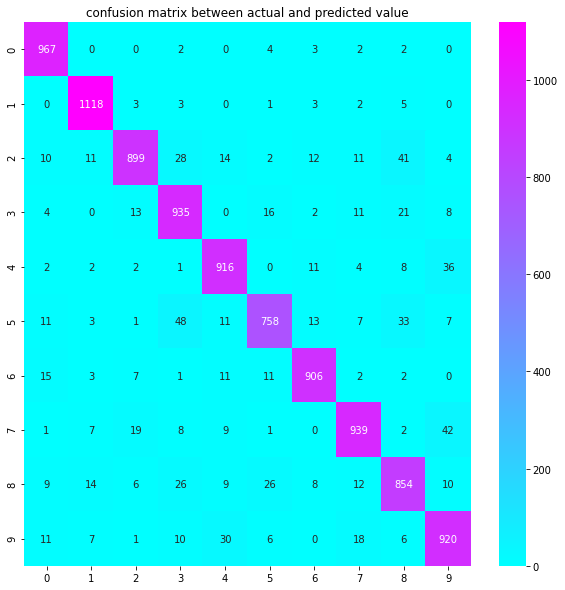

In [80]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.xlabel("predicted")
plt.ylabel("actual value")
plt.title("confusion matrix between actual and predicted value")
sns.heatmap(con_mat2,annot=True,fmt="d",cmap="cool")